# 모두를 위한 딥러닝 시즌2
##  Lab 07-1 training test dataset  learning rate normalization

In [3]:
import tensorflow as tf
from IPython.display import Image

## Overshooting

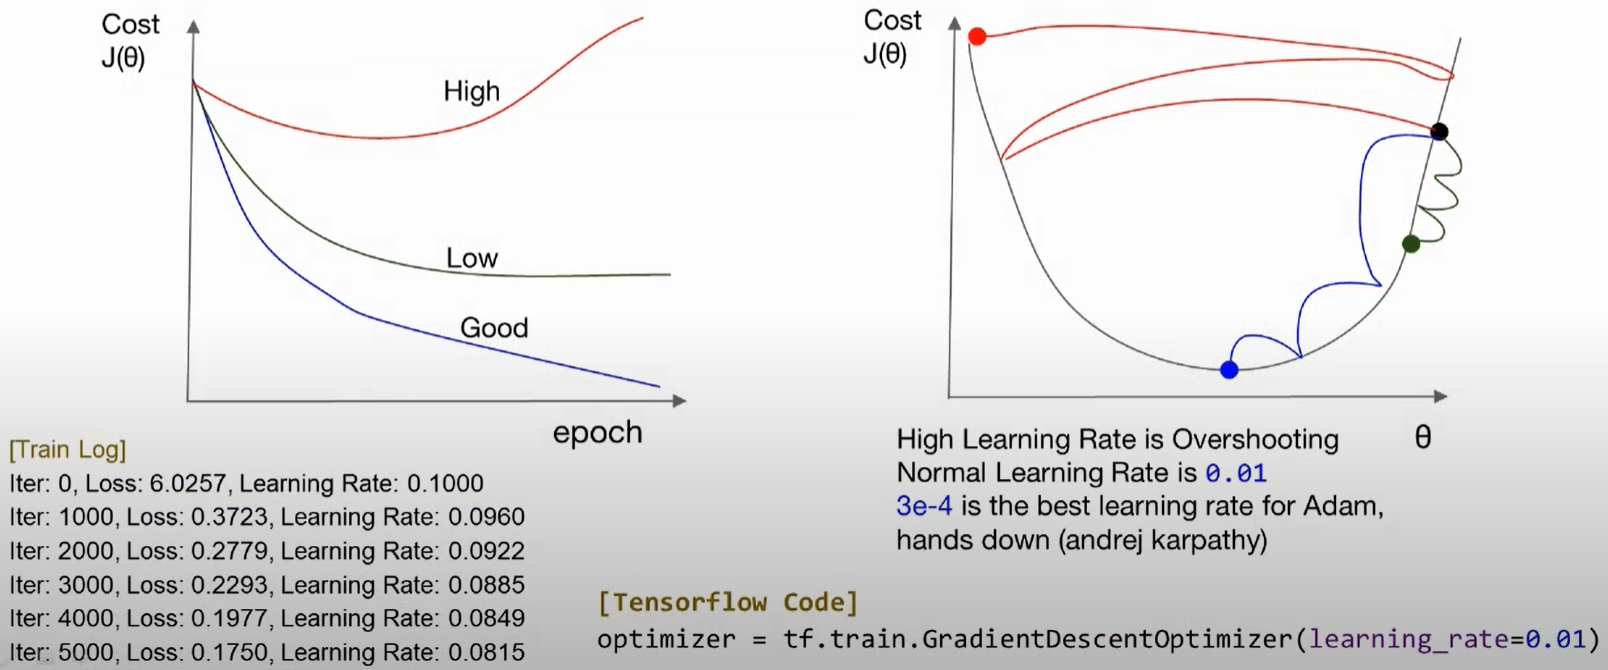

In [6]:
Image("Lab-07/1.png")

learning rate $\alpha$는 gradient discent를 하는 과정에서 hyper-parameter로 모델을 만들어가기 위한 설정 값으로,
$$
Repeat \quad \theta_{j} := \theta_{j}-\alpha\frac{\partial}{\partial\theta_j}J(\theta) $$
이다.

이때 learning rate 값을 정하는 것이 중요하다. 그 이유는 $\alpha$를 크게 잡으면 위 사진의 빨강 선과 같이 cost가 minimum으로 수렴하지 않고 발산하는 경향이 띄기 때문이다. 반대로 작게 잡으면 파랑 선과 같이 minimum으로 가는 시간이 너무 오래 걸리거나 local minimum에서 멈추는 경향이 있다. 따라서 learning rate를 적절한 값을 설정해 주어야 한다.

학습을 하는 과정에서 learning rate를 상황에 맞게 조절해주는 것을 **Learning rate decay**라고 한다.

## Learning rate Decay

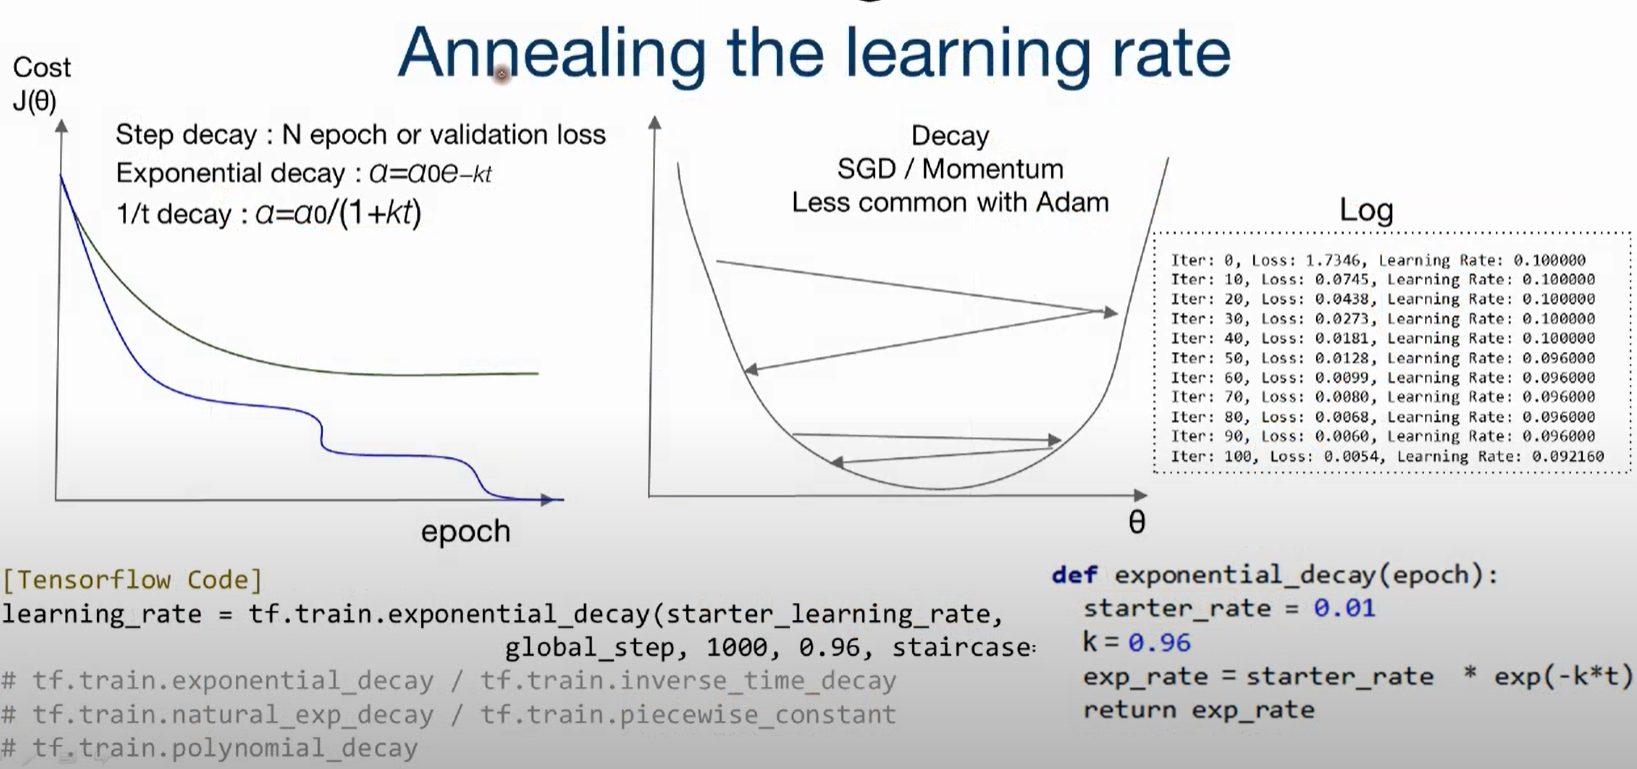

In [8]:
Image("Lab-07/2.png")

왼쪽의 그림과 같이 epoch에 따른 cost의 경향이 어느 단계에서 계단형태가 나타나는걸 볼 수 있다. 이것이 학습과정 중 learning rate를 조절하여 더 빠르게 cost를 minimum시키는 Learning rate Decay가 동작하는 모습이다. 이를 $\theta$와 cost 그래프로 본다면, 가운데 그림과 같이 학습 중 learning rate를 수정해 더 적은 획수로 minimum에 도달하는 것을 볼 수 있다.

이를 Tensorflow에서 제공하는 라이브러리 함수로 사용해도 되고, 하단 왼쪽과 같이 python 함수로 정의할 수 있다.

## Data preprocessing

주어진 입력 데이터의 분포가 너무 균일하지 않거나, learning rate를 적절하게 정했음에도 cost가 수렴하지 않고 발산하거나 이상한 동작을 보일 때는 Data preprocessing이 필요할 수 있다. 여러 preprocessing 방법 중 먼저 Feature Scaling에 대해 보자. Feature Scaling 기법은 크게 Standardization과 Normalization이 있다. 

$$
Standardization(Mean Distance) \quad x_{new} = \frac{x-\mu}{\sigma}\\
Normalization(0 \sim 1) \quad x_{new} = \frac{x-x_{min}}{x_{max}-x_{min}}$$